## Importing Required Libraries

In [1]:
#!pip install wordcloud

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
import joypy
import warnings
warnings.filterwarnings("ignore")


### Requesting page using requests library

In [3]:
url = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&ref_=adv_prv"
        
page = requests.get(url)
page

<Response [200]>

In [4]:
## Parsing page using BeautifulSoup Library

soup = BeautifulSoup(page.text, "html.parser")

In [5]:
Movie = []
Genre = []
Certification = []
Year = []
Time = []
Rating = []
Metascore = []
Votes = []
Gross = []
pattern = r'\d+\.\s+(.*?)\n'

In [6]:
movie_data = soup.findAll('div',attrs={'class': 'lister-item mode-advanced'})

In [7]:
for store in movie_data:
    name = store.h3.a.text
    Movie.append(name)
    
    year_of_release = store.h3.find('span',class_ ='lister-item-year text-muted unbold').text.replace('(',"").replace(')',"")
    Year.append(year_of_release)
    
    run_time = store.p.find('span',class_ = 'runtime').text.replace(' min',"")
    Time.append(run_time)
    
    ratings = store.find('div',class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
    Rating.append(ratings)
    
    meta = store.find('span', class_ = 'metascore').text.replace(' ','') if store.find('span', class_ = 'metascore') else "NA"
    Metascore.append(meta)
    
    voter = store.find_all('span', attrs = {'name' : 'nv'})
    
    vote = voter[0].text
    Votes.append(vote)
    
    gross = voter[1].text if len(voter) > 1 else "NA"
    Gross.append(gross)
    
    genre = store.p.find('span', class_ = 'genre').text.replace('\n','').split()[0]
    Genre.append(genre)
    
    certi = store.p.find('span', class_ = 'certificate').text if store.p.find('span', class_ = 'certificate') else "NA"
    Certification.append(certi)

### Checking the lengths of variables

In [8]:
print("Movie:", len(Movie))
print("Year:", len(Year))
print("Certification", len(Certification))
print("Genre:", len(Genre))
print("Time", len(Time))
print("Rating:", len(Rating))
print("Votes:", len(Votes))
print("Gross:", len(Gross))
print("Metascore:", len(Metascore))

Movie: 100
Year: 100
Certification 100
Genre: 100
Time 100
Rating: 100
Votes: 100
Gross: 100
Metascore: 100


#### Cleaning the variables which has special characters

In [9]:
Cleaned_year = [i.replace('II','').replace('I','').replace(' ','') for i in Year]

In [10]:
cleaned_genres = [i.rstrip(',') for i in Genre]

In [11]:
Cleaned_gross = [i.replace('$','').replace('M','').replace('#','') for i in Gross]

## Creating DataFrame From Page1

In [12]:
Movie_DF = pd.DataFrame({'Movie Title': Movie,
                         'Year of Realease' : Cleaned_year,
                         'Genre' : cleaned_genres,
                         'Run Time': Time,
                         'Movie Ratings' :Rating,
                         'Certificate':Certification,
                         'Votes':Votes,
                         'Collections in $M':Cleaned_gross,
                         'MetaScore':Metascore  })

In [13]:
Movie_DF.head()

Movie Title Year of Realease      Genre  \
0                       The Shawshank Redemption             1994      Drama   
1                                  The Godfather             1972      Crime   
2                                The Dark Knight             2008     Action   
3                               Schindler's List             1993  Biography   
4  The Lord of the Rings: The Return of the King             2003     Action   

  Run Time Movie Ratings Certificate      Votes Collections in $M MetaScore  
0      142           9.3           A  2,809,980             28.34        82  
1      175           9.2           A  1,958,196            134.97       100  
2      152           9.0          UA  2,791,597            534.86        84  
3      195           9.0           A  1,412,537             96.90        95  
4      201           9.0           U  1,923,633            377.85        94

### Scraping data from remaining pages

In [14]:
Movie1 = []
Year1 = []
Genre1 = []
Time1 = []
Rating1 = []
Metascore1 = []
Votes1 = []
Gross1 = []
Certification1 = []

`**Page2 web Scarping**`

- here we used for loop to get all the 9 pages and stored their data in 'i'
- we used same method as first page and saved the data in some variales

In [15]:
for i in range(1,10):
    url = 'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start='+str(i)+'01&ref_=adv_nxt'
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    
    movie_data1 = soup.findAll('div', attrs={'class':'lister-item mode-advanced'})
    for store in movie_data1:
        
        name1 = store.h3.a.text
        Movie1.append(name1)
    
        year_of_release1 = store.h3.find('span',class_ ='lister-item-year text-muted unbold').text.replace('(',"").replace(')',"")
        Year1.append(year_of_release1)
    
        run_time1 = store.p.find('span',class_ = 'runtime').text.replace(' min',"")
        Time1.append(run_time1)
    
        ratings1 = store.find('div',class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        Rating1.append(ratings1)
    
        meta1 = store.find('span', class_ = 'metascore').text.replace(' ','') if store.find('span', class_ = 'metascore') else "NA"
        Metascore1.append(meta1)
    
        voter1 = store.find_all('span', attrs = {'name' : 'nv'})
    
        vote1 = voter1[0].text
        Votes1.append(vote1)
    
        gross1 = voter1[1].text if len(voter1) > 1 else "NA"
        Gross1.append(gross1)
    
        genre1 = store.p.find('span', class_ = 'genre').text.replace('\n','').split()[0]
        Genre1.append(genre1)
    
        certi1 = store.p.find('span', class_ = 'certificate').text if store.p.find('span', class_ = 'certificate') else "NA"
        Certification1.append(certi1)
        
       

https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=401&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=501&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=601&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=701&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=801&ref_=adv_nxt
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=901&ref_=adv_nxt


### Checking the lengths of all variables 

In [16]:
print("Movie1:", len(Movie1))
print("Year1:", len(Year1))
print("Certification1", len(Certification1))
print("Genre1:", len(Genre1))
print("Time1", len(Time1))
print("Rating1:", len(Rating1))
print("Votes1:", len(Votes1))
print("Gross1:", len(Gross1))
print("Metascore1:", len(Metascore1))

Movie1: 900
Year1: 900
Certification1 900
Genre1: 900
Time1 900
Rating1: 900
Votes1: 900
Gross1: 900
Metascore1: 900


#### cleaning variables with special characters


In [17]:
Cleaned_year1 = [i.replace('II','').replace('I','').replace(' ','') for i in Year1]
#Cleaned_year1

In [18]:
cleaned_genres1 = [i.rstrip(',') for i in Genre1]
#cleaned_genres1

In [19]:
Cleaned_gross1 = [i.replace('$','').replace('M','').replace('#','') for i in Gross1]
#Cleaned_gross1

## Creating DataFrame2 from Remaining pages

In [20]:
Movie_DF2 = pd.DataFrame({'Movie Title': Movie1,
                         'Year of Realease' : Cleaned_year1,
                         'Genre' : cleaned_genres1,
                         'Run Time': Time1,
                         'Movie Ratings' :Rating1,
                         'Certificate':Certification1,
                         'Votes':Votes1,
                         'Collections in $M':Cleaned_gross1,
                         'MetaScore':Metascore1 })

In [21]:
Movie_DF2.head()

Movie Title Year of Realease      Genre Run Time Movie Ratings  \
0  2001: A Space Odyssey             1968  Adventure      149           8.3   
1                 Jagten             2012      Drama      115           8.3   
2             Braveheart             1995  Biography      178           8.3   
3         Reservoir Dogs             1992      Crime       99           8.3   
4              Toy Story             1995  Animation       81           8.3   

  Certificate      Votes Collections in $M MetaScore  
0           U    700,963             56.95        84  
1           7    351,626              0.69        77  
2           A  1,071,080             75.60        68  
3         15+  1,062,728              2.83        81  
4           U  1,041,098            191.80        96

### Merging Both Dataframes into single DataFrame

In [22]:
Combined_df = pd.concat([Movie_DF, Movie_DF2], ignore_index = True )

In [23]:
Combined_df

Movie Title Year of Realease  \
0                         The Shawshank Redemption             1994   
1                                    The Godfather             1972   
2                                  The Dark Knight             2008   
3                                 Schindler's List             1993   
4    The Lord of the Rings: The Return of the King             2003   
..                                             ...              ...   
995             The Taking of Pelham One Two Three             1974   
996                                          Shine             1996   
997                                        Control             2007   
998                Un long dimanche de fiançailles             2004   
999                                      Celda 211             2009   

         Genre Run Time Movie Ratings Certificate      Votes  \
0        Drama      142           9.3           A  2,809,980   
1        Crime      175           9.2           A  1,958,196   
2       Action      152           9.0          UA  2,791,597   
3    Biography      195           9.0           A  1,412,537   
4       Action      201           9.0           U  1,923,633   
..         ...      ...           ...         ...        ...   
995     Action      104           7.6           U     33,811   
996  Biography      105           7.6   Not Rated     55,890   
997  Biography      122           7.6           R     67,679   
998      Drama      133           7.6           U     75,278   
999     Action      113           7.6           A     69,824   

    Collections in $M MetaScore  
0               28.34        82  
1              134.97       100  
2              534.86        84  
3               96.90        95  
4              377.85        94  
..                ...       ...  
995              2.49        68  
996             35.81        87  
997              0.87        78  
998              6.17        76  
999                NA        NA  

[1000 rows x 9 columns]

In [24]:
Combined_df.replace('NA', pd.NA, inplace=True)

### Changing the display options to maximum

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Cleaning the DataFrame and Performimg Basic Operations

In [26]:
Combined_df.shape

(1000, 9)

In [27]:
print("Number of the columns :",Combined_df.shape[1])
print("Number of the rows :", Combined_df.shape[0])

Number of the columns : 9
Number of the rows : 1000


In [28]:
# getting column information
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Movie Title        1000 non-null   object
 1   Year of Realease   1000 non-null   object
 2   Genre              1000 non-null   object
 3   Run Time           1000 non-null   object
 4   Movie Ratings      1000 non-null   object
 5   Certificate        838 non-null    object
 6   Votes              1000 non-null   object
 7   Collections in $M  834 non-null    object
 8   MetaScore          845 non-null    object
dtypes: object(9)
memory usage: 70.4+ KB


In [29]:
Combined_df.isnull().sum()

Movie Title            0
Year of Realease       0
Genre                  0
Run Time               0
Movie Ratings          0
Certificate          162
Votes                  0
Collections in $M    166
MetaScore            155
dtype: int64

In [30]:
Combined_df.duplicated().any()

False

#### Certificate Column Null value Imputation

In [31]:
print(Combined_df['Certificate'].isnull().sum())
print(Combined_df['Certificate'].mode()[0])
Combined_df['Certificate'].fillna(Combined_df['Certificate'].mode()[0],inplace=True)
print("after imputation Null values: ", Combined_df['Certificate'].isnull().sum())

162
U
after imputation Null values:  0


#### Collections Column Null value Imputation

In [32]:
print(Combined_df['Collections in $M'].isnull().sum())
print(Combined_df['Collections in $M'].mode()[0])
Combined_df['Collections in $M'].fillna(Combined_df['Collections in $M'].mode()[0], inplace=True)
print("after imputation null values:", Combined_df['Collections in $M'].isnull().sum())

166
0.01
after imputation null values: 0


#### MetaScore Column Null value Imputation

In [33]:
print(Combined_df['MetaScore'].isnull().sum())
print(Combined_df['MetaScore'].mode()[0])
Combined_df['MetaScore'].fillna(Combined_df['MetaScore'].mode()[0], inplace=True)
print("after imputation null values:", Combined_df['MetaScore'].isnull().sum())

155
86
after imputation null values: 0


In [34]:
Combined_df.describe()

Movie Title Year of Realease  Genre Run Time Movie Ratings Certificate  \
count         1000             1000   1000     1000          1000        1000   
unique         997              102     14      143            17          20   
top       Scarface             2004  Drama      130           7.7           U   
freq             2               31    295       23           175         431   

            Votes Collections in $M MetaScore  
count        1000              1000      1000  
unique       1000               732        60  
top     2,809,980              0.01        86  
freq            1               174       193

## Type conversion using typecasting method

In [35]:
Combined_df['Collections in $M']= Combined_df['Collections in $M'].str.replace('#', '')

In [36]:
Combined_df['Collections in $M']= Combined_df['Collections in $M'].astype('float')
print(Combined_df['Collections in $M'].dtype)

float64


In [37]:
Combined_df['Votes']=Combined_df['Votes'].str.replace(',','').astype('int')

In [38]:
Combined_df['Votes'].head()

0    2809980
1    1958196
2    2791597
3    1412537
4    1923633
Name: Votes, dtype: int32

In [39]:
Combined_df['Run Time'] = Combined_df['Run Time'].astype('int')
print(Combined_df['Run Time'].dtype)

int32


In [40]:
Combined_df['Movie Ratings'] = Combined_df['Movie Ratings'].astype("float")
print(Combined_df['Movie Ratings'].dtype)

float64


In [41]:
Combined_df['MetaScore'] = Combined_df['MetaScore'].astype('int')
print(Combined_df['MetaScore'].dtype)

int32


In [42]:
Combined_df['Year of Realease'] = Combined_df['Year of Realease'].astype('int')
print(Combined_df['Year of Realease'].dtype)

int32


In [43]:
Combined_df.rename(columns={'Year of Realease':'Year of Release'}, inplace=True)

# Analyzing and Visualising the data

## Q. Which genre has most of the movies?

In [44]:
top_genre = Combined_df['Genre'].value_counts().reset_index()
top_genre

index  Genre
0       Drama    295
1      Action    186
2      Comedy    148
3       Crime    108
4   Biography     87
5   Animation     82
6   Adventure     65
7      Horror     13
8     Mystery      9
9     Western      2
10  Film-Noir      2
11    Fantasy      1
12     Family      1
13   Thriller      1

#### Visualising Genres of the movies

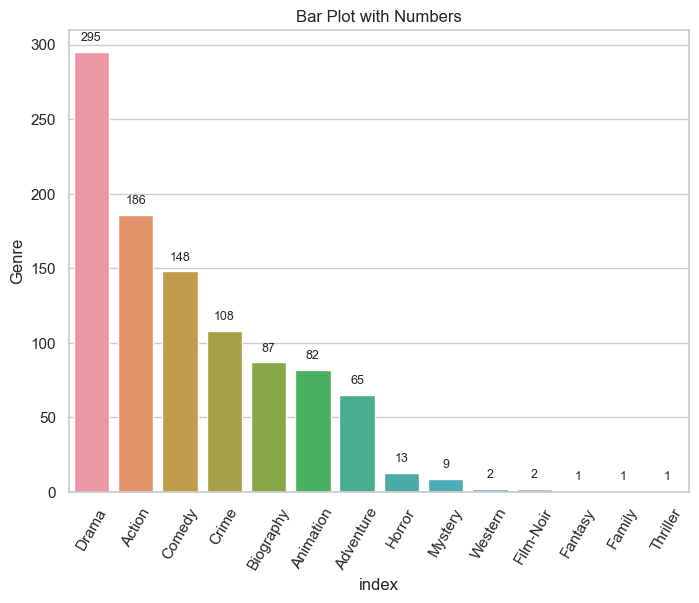

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(data=top_genre, x='index', y='Genre')
plt.xticks(rotation=60)
plt.title('Bar Plot with Numbers')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.show()

## Q. Which genre is the most prevalent?

In [46]:
genre_counts = Combined_df['Genre'].value_counts()

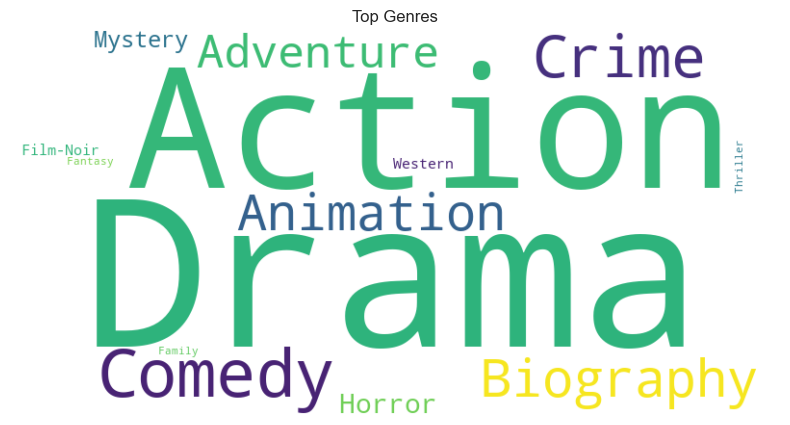

In [47]:
top_genres = genre_counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Genres")

plt.show()

- A dramatic film is connected closely with human emotions.
- Drama delivers the emotional and relational development of realistic characters in a realistic setting.
- It offers intense character development and tells an honest story of human struggle.
- `sources:`https://en.wikipedia.org/wiki/Drama_(film_and_television)

In [48]:
genre_counts = Combined_df['Genre'].value_counts()
drama_count = genre_counts['Drama']

print("Number of times 'Drama' has been repeated:", drama_count)


Number of times 'Drama' has been repeated: 295


## Are most of the movies family friendly??

In [49]:
## merging unnecessary certificates.

def merge_certificates(df):
    df['Certificate'] = df['Certificate'].replace({
        '12+': 'PG-13',
        '15+': '18',
        'UA 16+': '18',
        'PG': 'PG-13',
        'G' : 'PG-13',
        'U/A' : 'UA',
        '16' : '18',
        '13' : 'PG-13',
        '7' : 'PG-13',
        'UA 13+' : 'PG-13',
        'M/PG' : 'PG-13',
        
        
    })
    return df


Combined_df = merge_certificates(Combined_df)

In [50]:
Combined_df['Certificate'].value_counts().reset_index()

index  Certificate
0          U          431
1          A          212
2         UA          201
3          R           71
4      PG-13           44
5         18           23
6  Not Rated           16
7    Unrated            1
8   (Banned)            1

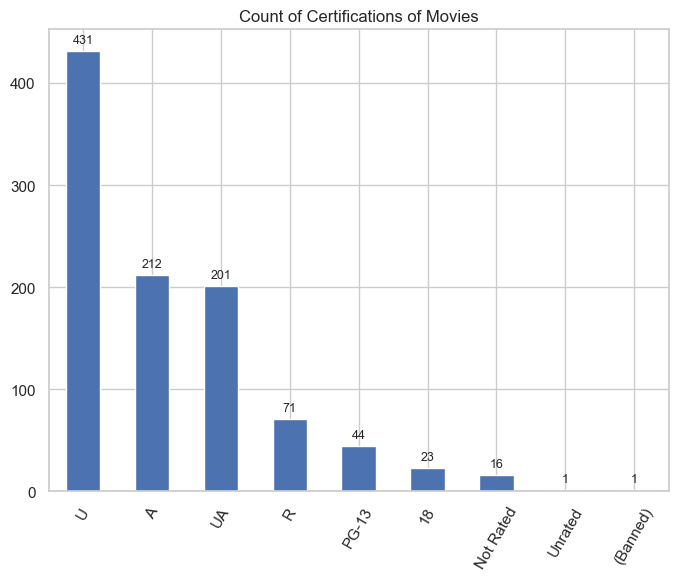

In [51]:
total = Combined_df['Certificate'].value_counts()

plt.figure(figsize=(8,6))
ax = total.plot(kind='bar', rot=0)
plt.xticks(rotation=60)
plt.title('Count of Certifications of Movies')
for i, v in enumerate(total):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

## Banned Movie:

In [52]:
Combined_df.loc[625].reset_index()

index           625
0        Movie Title  The Fugitive
1    Year of Release          1993
2              Genre        Action
3           Run Time           130
4      Movie Ratings           7.8
5        Certificate             U
6              Votes        310209
7  Collections in $M        183.88
8          MetaScore            87

####  **Banned movie:**
- Movie "The Girl With the Dragon tatto" was banned by Indian Censor Board over Explicit Scenes.
- The Girl with the Dragon Tattoo was banned in India because of its adult scenes. 
- The Central Board of Film Certification had a problem with these scenes.
- The film's director, David Fincher, refused to cut few explicit scenes from his R-rated adaptation of Stieg Larsson's best-selling book. 


- `Sources`: https://timesofindia.indiatimes.com/entertainment/hindi/bollywood/news/david-finchers-slick-adaptation-of-stieg-larssons-the-girl-with-the-dragon-tattoo-did-not-see-an-india-release/articleshow/34519488.cms

## Q. what is the Average Run time of movies ??

count    1000.000000
mean      124.196000
std        28.812875
min        45.000000
25%       103.000000
50%       120.000000
75%       139.000000
max       321.000000
Name: Run Time, dtype: float64

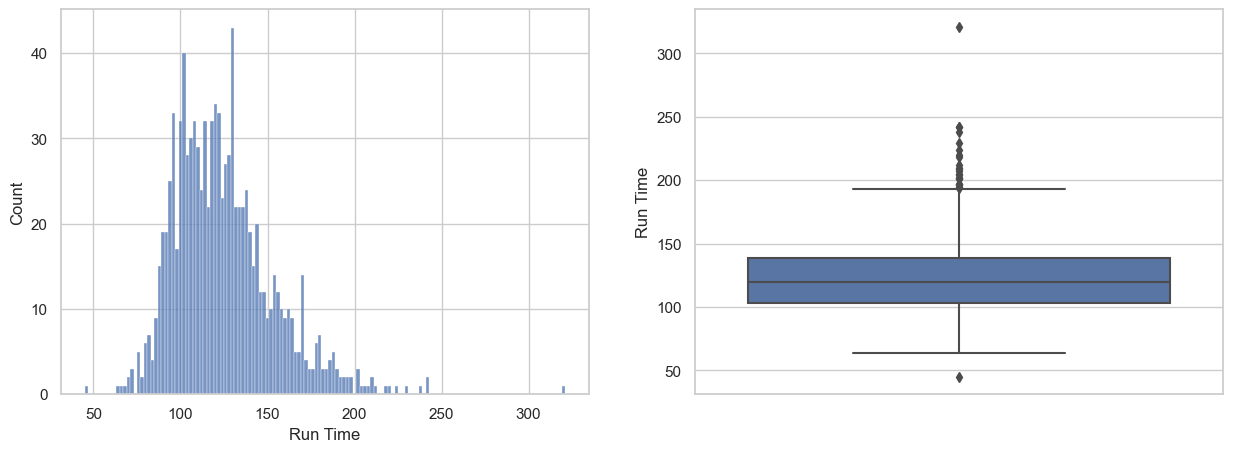

In [53]:
fig = plt.figure(figsize=(15, 5))
ax1, ax2 = fig.subplots(1,2)
sns.histplot(x="Run Time", data=Combined_df, ax=ax1, binwidth=2)
sns.boxplot(y="Run Time", data=Combined_df, ax=ax2);
Combined_df['Run Time'].describe()

On average, movies among the top 1000 rated have a runtime of approximately 2 hours


## Q. Do Family-friendly movies have a shorter runtime than age-restricted ones?¶

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, '18'),
  Text(6, 0, 'Not Rated'),
  Text(7, 0, 'Unrated'),
  Text(8, 0, '(Banned)')])

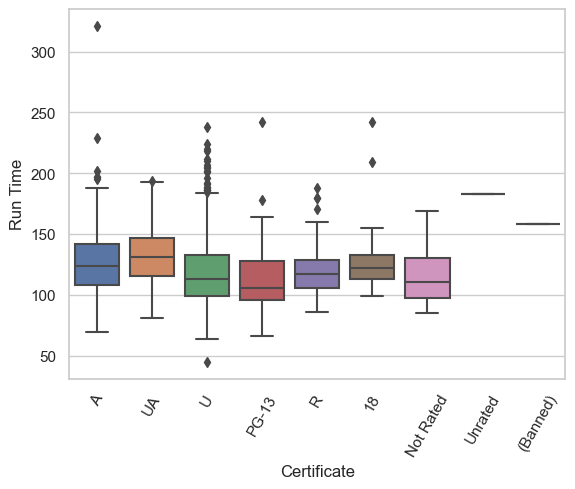

In [54]:
sns.boxplot(x="Certificate", y="Run Time", data=Combined_df);
Combined_df.groupby(by="Certificate")["Run Time"].describe()
plt.xticks(rotation=60)

Not really, except for kids movies there is not much difference in family friendly and Age-restricted movies

## Q. Are Drama movies longer than any other Genres?

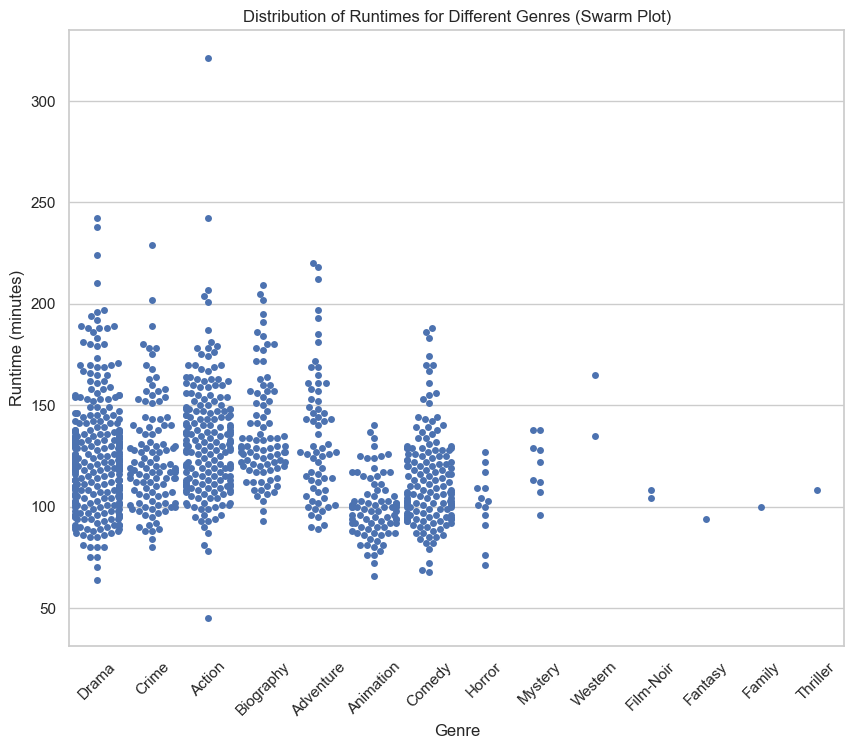

In [55]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='Genre', y='Run Time', data=Combined_df)
plt.xticks(rotation=45)
plt.title('Distribution of Runtimes for Different Genres (Swarm Plot)')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()


**`observation`** - The average of Drama movies is 2hrs, Action movies and Adventure genre movies has more run time than genre.

### Calculating the mean run time of each genres

In [56]:
Combined_df.groupby('Genre')['Run Time'].mean().reset_index()

Genre    Run Time
0      Action  133.435484
1   Adventure  134.984615
2   Animation   99.963415
3   Biography  137.540230
4      Comedy  113.722973
5       Crime  125.564815
6       Drama  124.830508
7      Family  100.000000
8     Fantasy   94.000000
9   Film-Noir  106.000000
10     Horror  102.000000
11    Mystery  120.333333
12   Thriller  108.000000
13    Western  150.000000

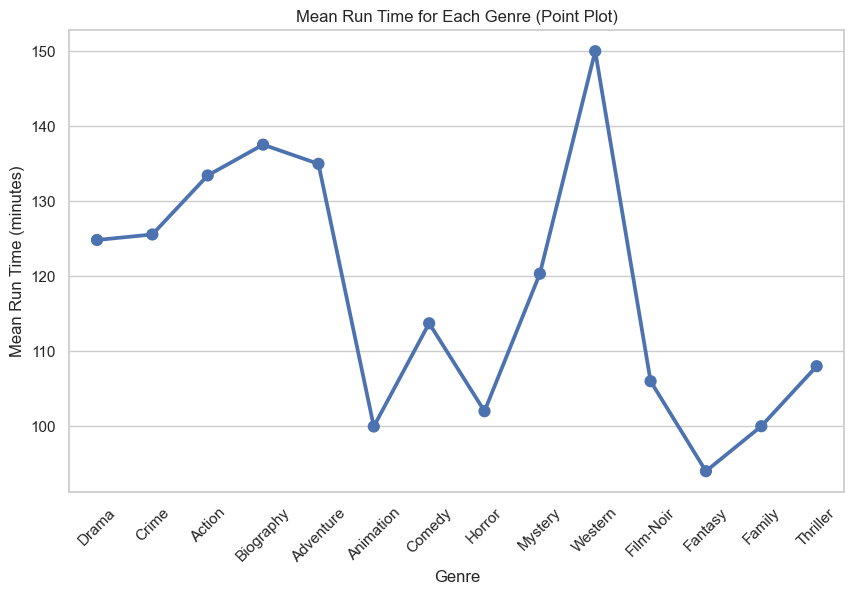

In [57]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Genre', y='Run Time', data=Combined_df, ci=None)
plt.xticks(rotation=45)
plt.title('Mean Run Time for Each Genre (Point Plot)')
plt.xlabel('Genre')
plt.ylabel('Mean Run Time (minutes)')
plt.show()

## Q. Are modern films longer than older films??

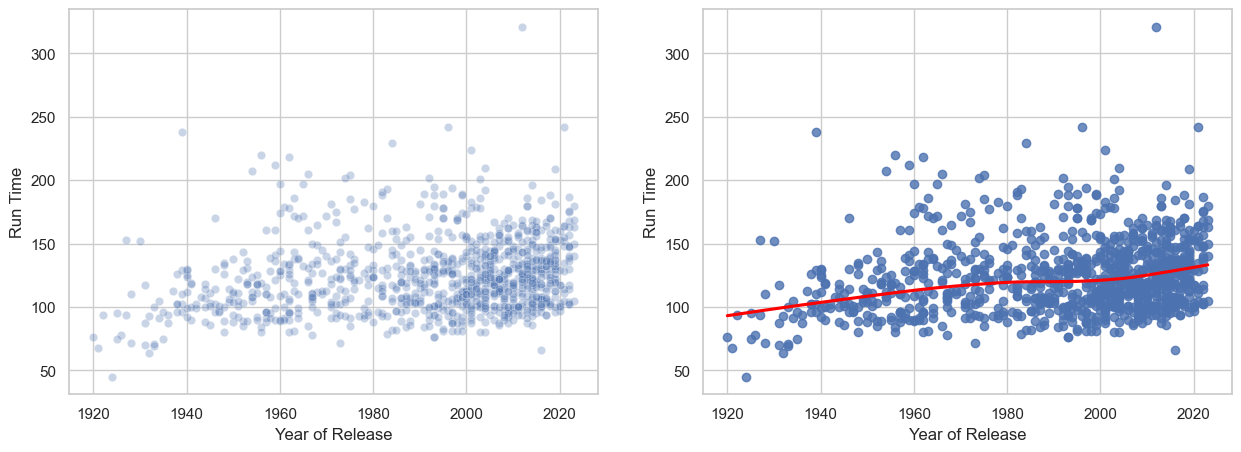

In [58]:
fig = plt.figure(figsize=(15, 5))
ax1, ax2 = fig.subplots(1,2)

sns.scatterplot(x="Year of Release", y="Run Time", data=Combined_df, alpha=0.3, ax=ax1);
sns.regplot(x="Year of Release", y="Run Time", data=Combined_df, lowess=True, 
            line_kws={'color': 'red'}, ax=ax2)
plt.show()

There is slow ascending behaviour, reasons behind might be:
- Lack of technology back in those days.
- Before Movies were experimental, so producers used to invest small amount.
- One of the reasons might be OTTs.

## Q. Does good rated movies have higher Collections??

index  Collections in $M
0  Movie Ratings           0.137444
1      MetaScore          -0.127856

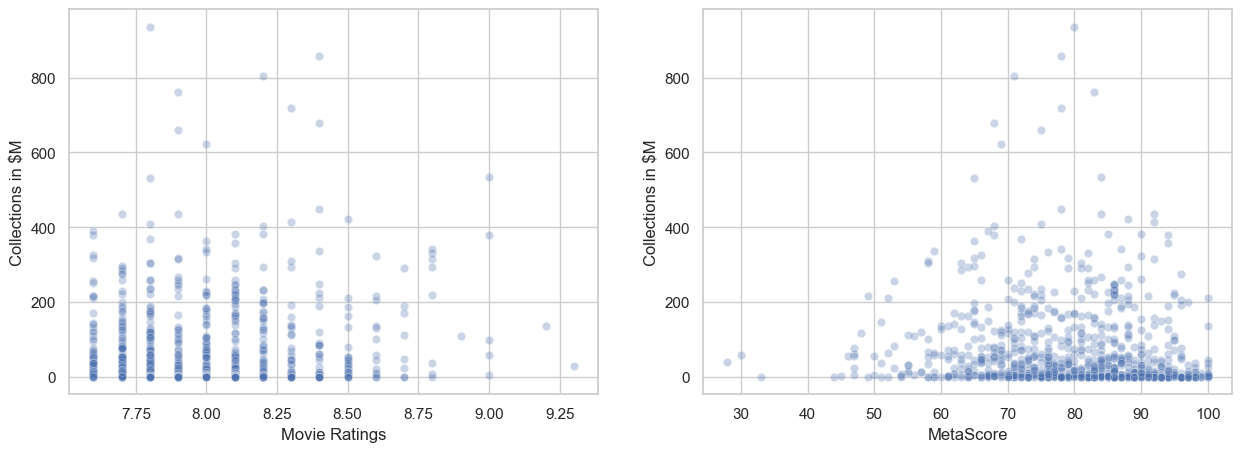

In [59]:
fig = plt.figure(figsize=(15, 5))
ax1, ax2 = fig.subplots(1,2)
sns.scatterplot(y="Collections in $M", x="Movie Ratings", data=Combined_df, ax=ax1, alpha=0.3)
sns.scatterplot(y="Collections in $M", x="MetaScore", data=Combined_df, ax=ax2, alpha=0.3)

Combined_df[['Movie Ratings', 'MetaScore', 'Collections in $M']].corr().iloc[:2,2].reset_index()

- we can see there is difference between critics and Audience 
- The higher the IMDB MetScore which is decided by MetaCritics of IMDB, the higher the collections.

## Movies which are rated well by audience and rated poorly by critics

In [60]:
high_ratings_threshold = 7.0
low_metascore_threshold = 50

high_ratings_low_meta = Combined_df[
    (Combined_df['Movie Ratings']>=high_ratings_threshold) &
    (Combined_df['MetaScore']<=low_metascore_threshold)
]

high_ratings_low_meta[['Movie Title', 'Genre', 'Movie Ratings', 'MetaScore', 'Year of Release']].reset_index()

index           Movie Title      Genre  Movie Ratings  MetaScore  \
0     406  Pink Floyd: The Wall      Drama            8.0         47   
1     430        Tropa de Elite     Action            8.0         33   
2     484     Bohemian Rhapsody  Biography            7.9         49   
3     513        Bound by Honor      Crime            7.9         47   
4     551       My Name Is Khan  Adventure            7.9         50   
5     613             Tombstone  Biography            7.8         50   
6     626   Remember the Titans  Biography            7.8         48   
7     627              Predator     Action            7.8         47   
8     682   La migliore offerta      Crime            7.8         49   
9     766           Man on Fire     Action            7.7         47   
10    804   The Boondock Saints     Action            7.7         44   
11    818           Primal Fear      Crime            7.7         47   
12    845               Flipped     Comedy            7.7         45   
13    934                   Saw     Horror            7.6         46   
14    956  The Butterfly Effect      Drama            7.6         30   
15    987              I Am Sam      Drama            7.6         28   

    Year of Release  
0              1982  
1              2007  
2              2018  
3              1993  
4              2010  
5              1993  
6              2000  
7              1987  
8              2013  
9              2004  
10             1999  
11             1996  
12             2010  
13             2004  
14             2004  
15             2001

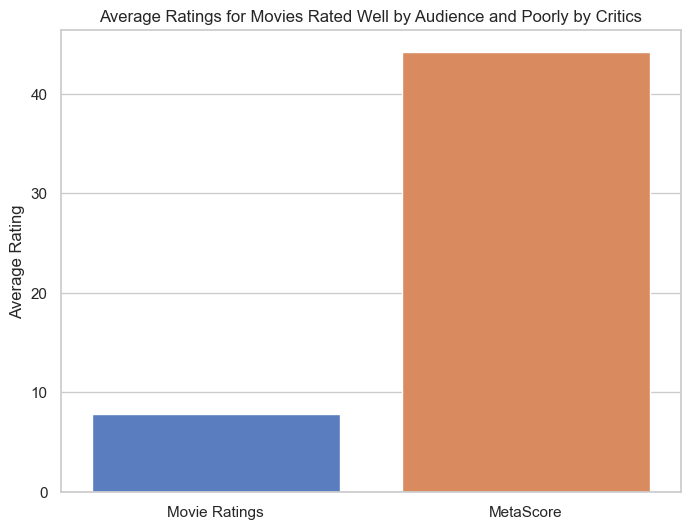

In [61]:
avg_ratings = high_ratings_low_meta[['Movie Ratings', 'MetaScore']].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='muted')
plt.title('Average Ratings for Movies Rated Well by Audience and Poorly by Critics')
plt.ylabel('Average Rating')
plt.show()

`observation` - This is because audience get impressed by the visuals and critics analyse the movie based on its story, visuals, camera work and etc.

## which movie has the highest revenue till date??

In [62]:
max_rev = Combined_df['Collections in $M'].max()

In [63]:
Combined_df[Combined_df['Collections in $M'] == max_rev]

Movie Title  Year of Release   Genre  \
619  Star Wars: Episode VII - The Force Awakens             2015  Action   

     Run Time  Movie Ratings Certificate   Votes  Collections in $M  MetaScore  
619       138            7.8           U  958738             936.66         80

In [93]:
Combined_df.loc[619].reset_index()

index                                         619
0        Movie Title  Star Wars: Episode VII - The Force Awakens
1    Year of Release                                        2015
2              Genre                                      Action
3           Run Time                                         138
4      Movie Ratings                                         7.8
5        Certificate                                           U
6              Votes                                      958738
7  Collections in $M                                      936.66
8          MetaScore                                          80
9             Review                                        Good

In [65]:
highest_gross=Combined_df.sort_values(['Collections in $M'], ascending=False).head()

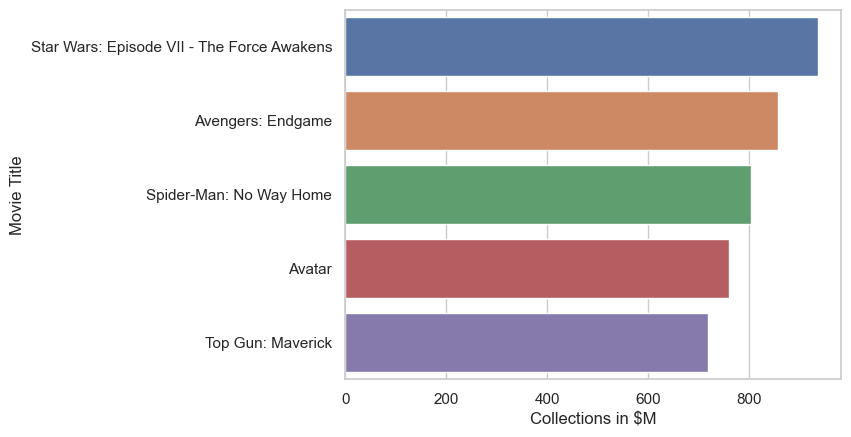

In [66]:
sns.barplot(data=highest_gross, x='Collections in $M', y='Movie Title')
plt.show() 

- Stars wars is the highest revenue movie with 936 million dollars
- The film made by JJ Abrams was released in 2015 and its budgest was 430 million US Dollars
- `Sources:` https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens

## what is the longest movie and shortest movie ever made??

In [67]:
max_run = Combined_df['Run Time'].max()
min_run = Combined_df['Run Time'].min()

In [68]:
Combined_df[Combined_df['Run Time'] == max_run]

Movie Title  Year of Release   Genre  Run Time  Movie Ratings  \
182  Gangs of Wasseypur             2012  Action       321            8.2   

    Certificate   Votes  Collections in $M  MetaScore  
182           A  101143               0.01         89

- Gangs of wasseypur made by anurag kashyap is 2hour 39 min movie.
- It is misinformed as 5hours 21 min movie in the imdb website along with lot of movies.
- It is why we have outliers in run time

In [69]:
Combined_df[Combined_df['Run Time'] == min_run]

Movie Title  Year of Release   Genre  Run Time  Movie Ratings  \
201  Sherlock Jr.             1924  Action        45            8.2   

    Certificate  Votes  Collections in $M  MetaScore  
201           U  54454               0.98         86

## In which year highest number of movies released?

In [70]:
year_counts = Combined_df['Year of Release'].value_counts()

for year, count in year_counts.items():
    if count > 10:
        print(f"Year: {year}, Movies Released: {count}")

Year: 2004, Movies Released: 31
Year: 2014, Movies Released: 30
Year: 2013, Movies Released: 28
Year: 2016, Movies Released: 27
Year: 2001, Movies Released: 26
Year: 2019, Movies Released: 26
Year: 2007, Movies Released: 25
Year: 2009, Movies Released: 25
Year: 2006, Movies Released: 23
Year: 2012, Movies Released: 23
Year: 2015, Movies Released: 22
Year: 2010, Movies Released: 21
Year: 2018, Movies Released: 21
Year: 2003, Movies Released: 20
Year: 1993, Movies Released: 20
Year: 2017, Movies Released: 19
Year: 2008, Movies Released: 19
Year: 1997, Movies Released: 19
Year: 2022, Movies Released: 18
Year: 2000, Movies Released: 18
Year: 1999, Movies Released: 17
Year: 1995, Movies Released: 17
Year: 2005, Movies Released: 16
Year: 2011, Movies Released: 16
Year: 2002, Movies Released: 16
Year: 1998, Movies Released: 15
Year: 1962, Movies Released: 14
Year: 1992, Movies Released: 13
Year: 1986, Movies Released: 12
Year: 1994, Movies Released: 12
Year: 1982, Movies Released: 11
Year: 19

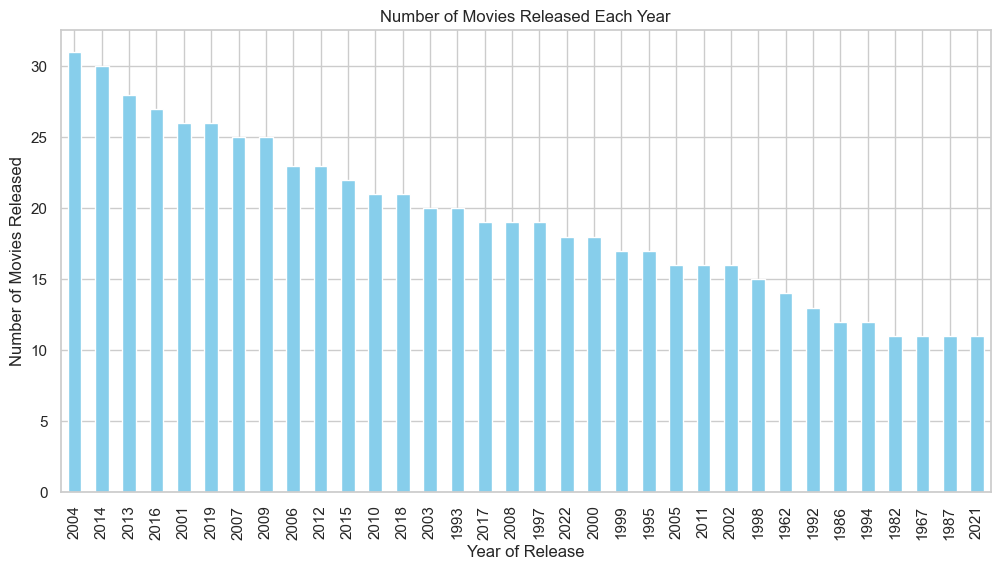

In [71]:
year_counts = Combined_df['Year of Release'].value_counts()

# Filter the years with more than 10 movies
filtered_years = year_counts[year_counts > 10]

# Create a bar chart
plt.figure(figsize=(12, 6))
filtered_years.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.show()

- 31 movies released in the year 2004

## what are theTop 10 Movies with highest Votes ?

In [72]:
top_10_movies = Combined_df.nlargest(10, 'Votes')  
fig = px.bar(top_10_movies, x='Votes', y='Movie Title', orientation='h', text='Votes', title='Top 10 Movies with Highest Votes')
fig.update_traces(marker_color='skyblue', marker_line_width=1.5, marker_line_color='black')
fig.update_layout(xaxis_title='Votes', yaxis_title='Movie Title', xaxis_showgrid=True, yaxis_showgrid=False)
fig.show()

### Creating a new column based on rating it will return good>average>bad

In [73]:
def Movie_review(rating):
    if float(rating) >=8:
        return 'Very Good'
    elif float(rating) >= 7 and rating <8:
        return 'Good'
    elif float(rating) >= 6  and rating <7:
        return 'Average'
    else:
        return 'Bad'

In [74]:
Combined_df['Review'] = Combined_df['Movie Ratings'].apply(lambda x : Movie_review(x))

In [75]:
Combined_df.head()

Movie Title  Year of Release      Genre  \
0                       The Shawshank Redemption             1994      Drama   
1                                  The Godfather             1972      Crime   
2                                The Dark Knight             2008     Action   
3                               Schindler's List             1993  Biography   
4  The Lord of the Rings: The Return of the King             2003     Action   

   Run Time  Movie Ratings Certificate    Votes  Collections in $M  MetaScore  \
0       142            9.3           A  2809980              28.34         82   
1       175            9.2           A  1958196             134.97        100   
2       152            9.0          UA  2791597             534.86         84   
3       195            9.0           A  1412537              96.90         95   
4       201            9.0           U  1923633             377.85         94   

      Review  
0  Very Good  
1  Very Good  
2  Very Good  
3  Very Good  
4  Very Good

### Drama movies with run time over 120 minutes with Very Good review and rating over 8.5 and MetaScore over 70

In [76]:
filtered= Combined_df[
    (Combined_df['Genre']=='Drama') &
    (Combined_df['Run Time']>120) &
    (Combined_df['Review']=='Very Good') &
    (Combined_df['Movie Ratings']>=8.5) &
    (Combined_df['MetaScore']>=70)
]
filtered

Movie Title  Year of Release  Genre  Run Time  \
0          The Shawshank Redemption             1994  Drama       142   
11                     Forrest Gump             1994  Drama       142   
20  One Flew Over the Cuckoo's Nest             1975  Drama       133   
26              Saving Private Ryan             1998  Drama       169   
33            It's a Wonderful Life             1946  Drama       130   
41                     Gisaengchung             2019  Drama       132   
45                 Django Unchained             2012  Drama       165   
57            Nuovo Cinema Paradiso             1988  Drama       155   
59                               96             2018  Drama       158   

    Movie Ratings Certificate    Votes  Collections in $M  MetaScore  \
0             9.3           A  2809980              28.34         82   
11            8.8          UA  2187483             330.25         82   
20            8.7           A  1046875             112.00         84   
26            8.6           A  1455469             216.54         91   
33            8.6       PG-13   480564              20.00         89   
41            8.5           A   895230              53.37         96   
45            8.5           A  1641796             162.81         81   
57            8.5           U   274968              11.99         80   
59            8.5           U    34564               0.01         86   

       Review  
0   Very Good  
11  Very Good  
20  Very Good  
26  Very Good  
33  Very Good  
41  Very Good  
45  Very Good  
57  Very Good  
59  Very Good

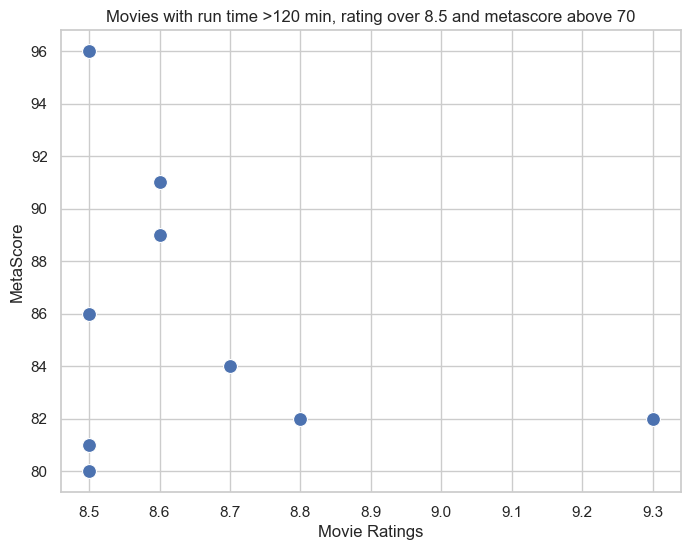

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Movie Ratings', y='MetaScore', data=filtered, color='b', s=100)
plt.title('Movies with run time >120 min, rating over 8.5 and metascore above 70')
plt.xlabel('Movie Ratings')
plt.ylabel('MetaScore')
plt.show()


### What are the movies that are top rated and family friendly??

In [78]:
top_rated_family_friendly=Combined_df[
    (Combined_df['Certificate']=='U') &
    (Combined_df['Movie Ratings']>8.5) &
    (Combined_df['Review']=='Very Good') 
]
top_rated_family_friendly

Movie Title  Year of Release  \
4       The Lord of the Rings: The Return of the King             2003   
5                                        12 Angry Men             1957   
10  The Lord of the Rings: The Fellowship of the Ring             2001   
16                Spider-Man: Across the Spider-Verse             2023   
23                                    Soorarai Pottru             2020   
27                                          Star Wars             1977   
30                      Sen to Chihiro no kamikakushi             2001   
32                                    La vita è bella             1997   
34                               Shichinin no samurai             1954   
35                                            Seppuku             1962   
36                                         Sita Ramam             2022   

        Genre  Run Time  Movie Ratings Certificate    Votes  \
4      Action       201            9.0           U  1923633   
5       Crime        96            9.0           U   836581   
10     Action       178            8.8           U  1951656   
16  Animation       140            8.7           U   278182   
23     Action       153            8.7           U   121162   
27     Action       121            8.6           U  1417955   
30  Animation       125            8.6           U   814004   
32     Comedy       116            8.6           U   725099   
34     Action       207            8.6           U   359126   
35     Action       133            8.6           U    64397   
36     Action       163            8.6           U    63529   

    Collections in $M  MetaScore     Review  
4              377.85         94  Very Good  
5                4.36         97  Very Good  
10             315.54         92  Very Good  
16              22.00         86  Very Good  
23               0.01         86  Very Good  
27             322.74         90  Very Good  
30              10.06         96  Very Good  
32              57.60         59  Very Good  
34               0.27         98  Very Good  
35              45.00         85  Very Good  
36               0.01         86  Very Good

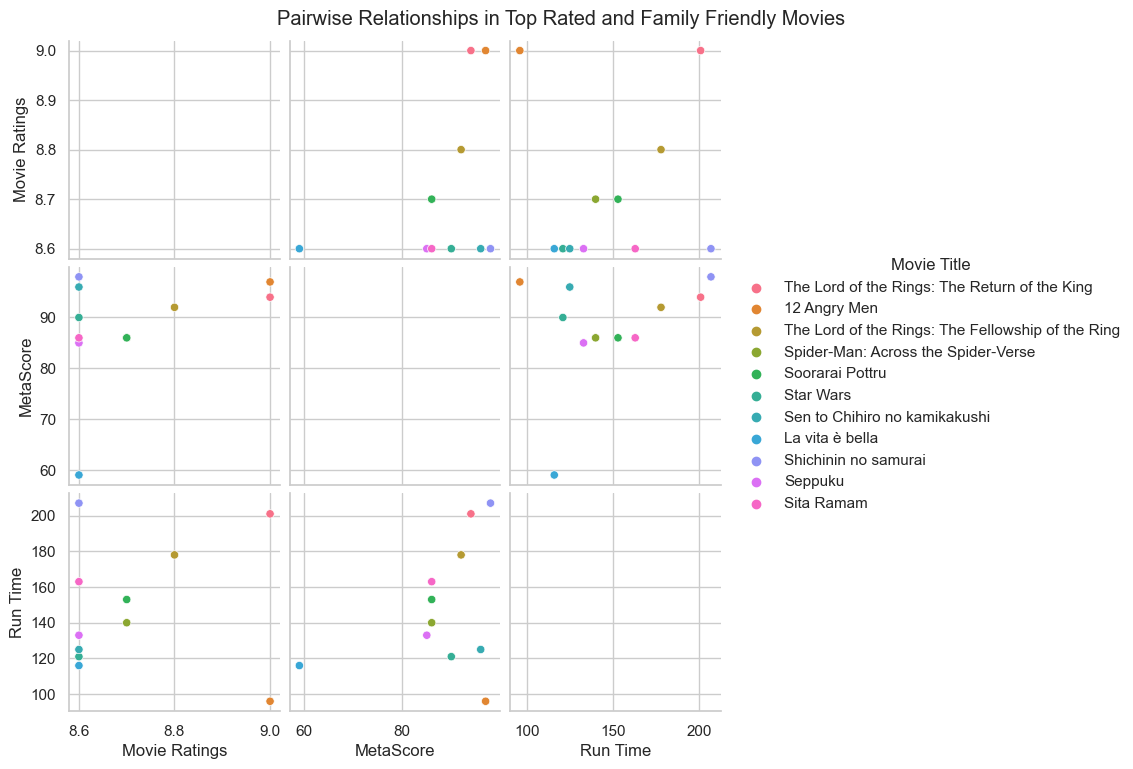

<Figure size 800x600 with 0 Axes>

In [79]:
plot = sns.pairplot(top_rated_family_friendly, vars=['Movie Ratings', 'MetaScore', 'Run Time'], hue='Movie Title', diag_kind='kde')
plt.suptitle('Pairwise Relationships in Top Rated and Family Friendly Movies', y=1.02)
plt.figure(figsize=(8,6))
plt.show()

## Distribution of Run time

<Axes: >

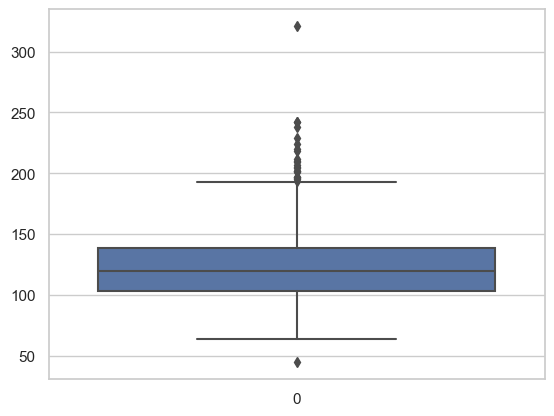

In [80]:
sns.boxplot(data=Combined_df['Run Time'])

In [81]:
Combined_df[(Combined_df['Run Time']>200)]

Movie Title  Year of Release  \
4    The Lord of the Rings: The Return of the King             2003   
6                            The Godfather Part II             1974   
34                            Shichinin no samurai             1954   
106                    Once Upon a Time in America             1984   
113                             Lawrence of Arabia             1962   
165                             Gone with the Wind             1939   
182                             Gangs of Wasseypur             2012   
187                         Swades: We, the People             2004   
256                                        Ben-Hur             1959   
303              Lagaan: Once Upon a Time in India             2001   
304                                  Andrei Rublev             1966   
328                                         Sholay             1975   
496                   Zack Snyder's Justice League             2021   
503                           The Ten Commandments             1956   
610                                   The Irishman             2019   
842                                      Malcolm X             1992   
869                                         Hamlet             1996   

         Genre  Run Time  Movie Ratings Certificate    Votes  \
4       Action       201            9.0           U  1923633   
6        Crime       202            9.0           A  1329641   
34      Action       207            8.6           U   359126   
106      Crime       229            8.3           A   368130   
113  Adventure       218            8.3           U   306640   
165      Drama       238            8.2           U   327468   
182     Action       321            8.2           A   101143   
187      Drama       210            8.2           U    95618   
256  Adventure       212            8.1           U   248647   
303      Drama       224            8.1           U   118449   
304  Biography       205            8.1           U    55970   
328     Action       204            8.1           U    57844   
496     Action       242            7.9          18   425597   
503  Adventure       220            7.9           U    75303   
610  Biography       209            7.8          18   415190   
842  Biography       202            7.7           U    99790   
869      Drama       242            7.7       PG-13    39382   

     Collections in $M  MetaScore     Review  
4               377.85         94  Very Good  
6                57.30         90  Very Good  
34                0.27         98  Very Good  
106               5.32         75  Very Good  
113              44.82        100  Very Good  
165             198.68         97  Very Good  
182               0.01         89  Very Good  
187               1.22         86  Very Good  
256              74.70         90  Very Good  
303               0.91         84  Very Good  
304               0.10         86  Very Good  
328               0.01         86  Very Good  
496               0.01         54       Good  
503              93.74         86       Good  
610               7.00         94       Good  
842              48.17         73       Good  
869               4.41         86       Good

## Outlier movies which have run time above 200 mins

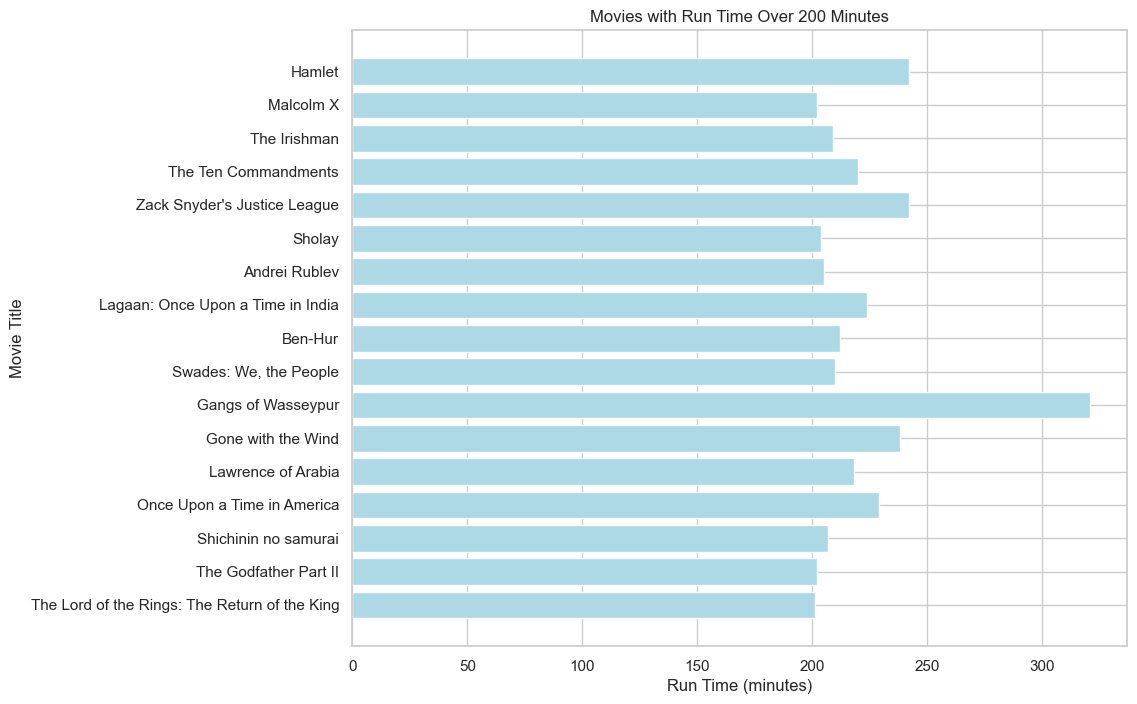

In [82]:
long_movies = Combined_df[Combined_df['Run Time'] > 200]  
plt.figure(figsize=(10, 8))
plt.barh(long_movies['Movie Title'], long_movies['Run Time'], color='lightblue')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Movie Title')
plt.title('Movies with Run Time Over 200 Minutes')
plt.show()

## Distribution of Collections

<Axes: >

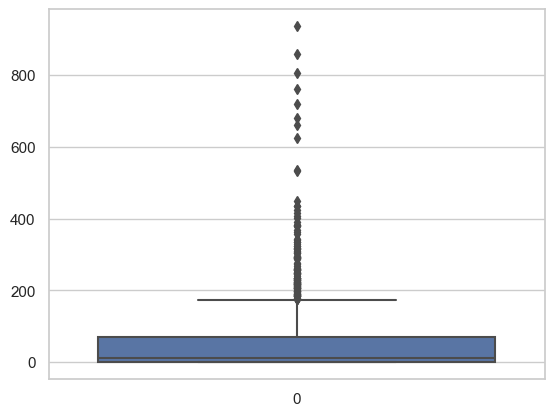

In [83]:
sns.boxplot(data=Combined_df['Collections in $M'])

- There are 282 movies whose collections are misinformed as below 1 million dollars.
- Because of these errors we getting distribution towards zero
- there are few movies whose collections are more than 600 millions dollars.
- because of that irregularity in the data we can see some outliers.

In [84]:
Combined_df[(Combined_df['Collections in $M']>0)&(Combined_df['Collections in $M']<1)].value_counts().sum()

282

## Movies with gross collection above 600 millions 

In [85]:
Combined_df[(Combined_df['Collections in $M']>600)]

Movie Title  Year of Release   Genre  \
64                            Avengers: Endgame             2019  Action   
74                       Avengers: Infinity War             2018  Action   
92                            Top Gun: Maverick             2022  Action   
142                     Spider-Man: No Way Home             2021  Action   
360                                The Avengers             2012  Action   
473                                     Titanic             1997   Drama   
483                                      Avatar             2009  Action   
619  Star Wars: Episode VII - The Force Awakens             2015  Action   

     Run Time  Movie Ratings Certificate    Votes  Collections in $M  \
64        181            8.4          UA  1220117             858.37   
74        149            8.4          UA  1160752             678.82   
92        130            8.3          UA   635594             718.73   
142       148            8.2          UA   836770             804.75   
360       143            8.0          UA  1436111             623.28   
473       194            7.9          UA  1250055             659.33   
483       162            7.9          UA  1363000             760.51   
619       138            7.8           U   958738             936.66   

     MetaScore     Review  
64          78  Very Good  
74          68  Very Good  
92          78  Very Good  
142         71  Very Good  
360         69  Very Good  
473         75       Good  
483         83       Good  
619         80       Good

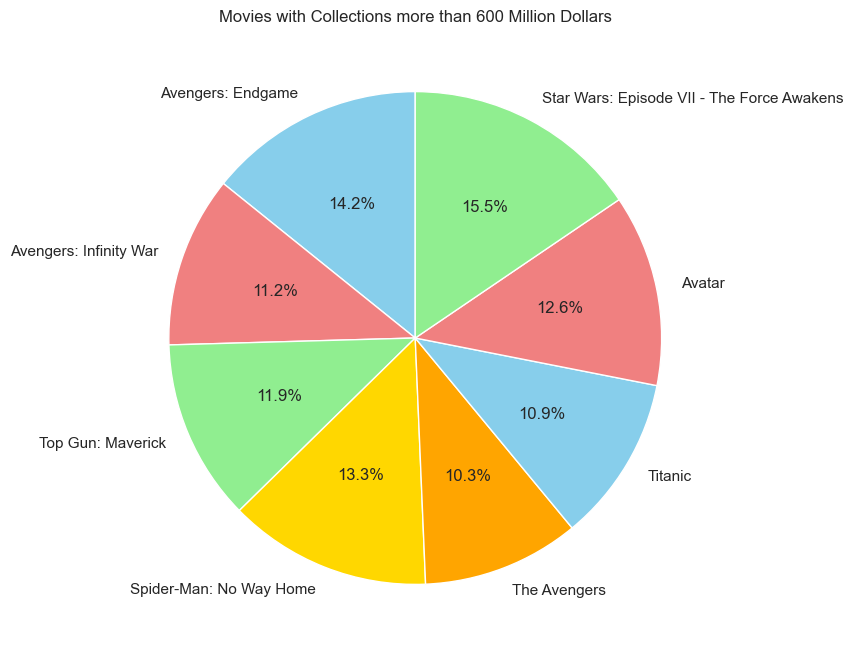

In [86]:
high_collections_movies = Combined_df[Combined_df['Collections in $M'] > 600]

# Create a pie chart
labels = high_collections_movies['Movie Title']
sizes = high_collections_movies['Collections in $M']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange']  # Add more colors if needed

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Movies with Collections more than 600 Million Dollars')
plt.show()

## Distribution of Movie Ratings

<Axes: >

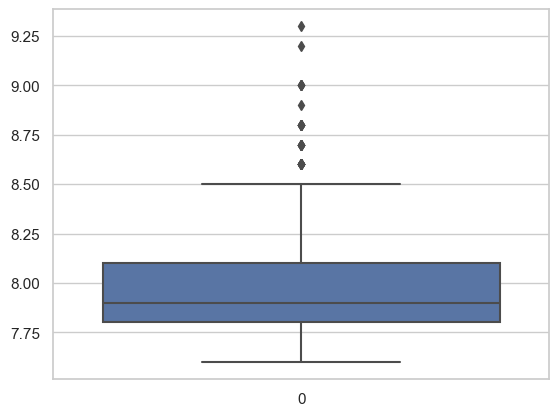

In [87]:
sns.boxplot(data=Combined_df['Movie Ratings'])

## Outlier movies with ratings above 8.50

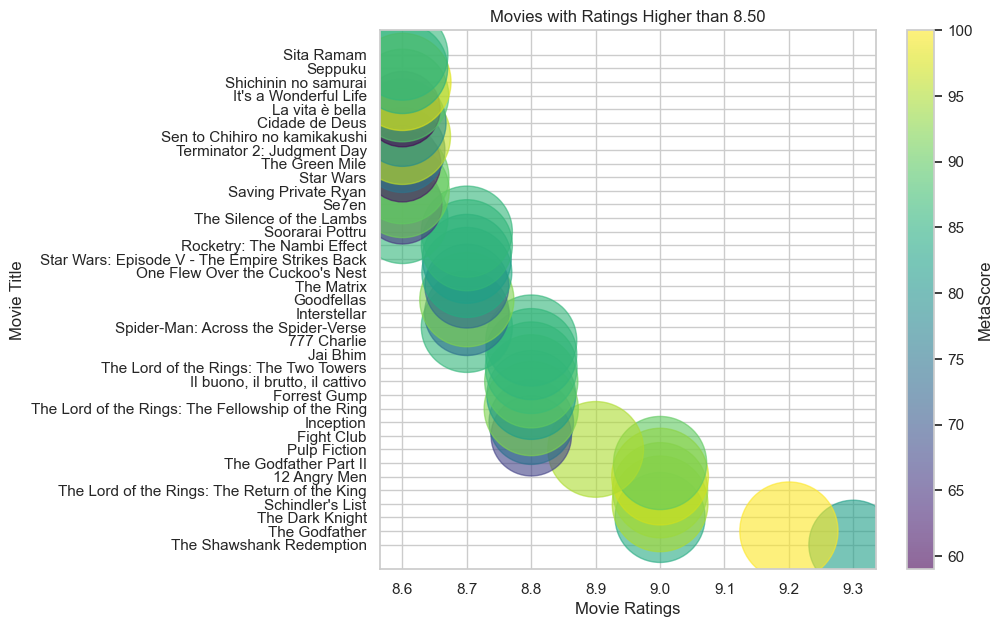

In [88]:
high_rated_movies = Combined_df[Combined_df['Movie Ratings'] > 8.50]
plt.figure(figsize=(8, 7))
plt.scatter(high_rated_movies['Movie Ratings'], high_rated_movies['Movie Title'],
            s=high_rated_movies['MetaScore']*50, c=high_rated_movies['MetaScore'], cmap='viridis', alpha=0.6)

plt.xlabel('Movie Ratings')
plt.ylabel('Movie Title')
plt.title('Movies with Ratings Higher than 8.50')
plt.colorbar(label='MetaScore')
plt.show()

## Distribution of MetaScore

<Axes: >

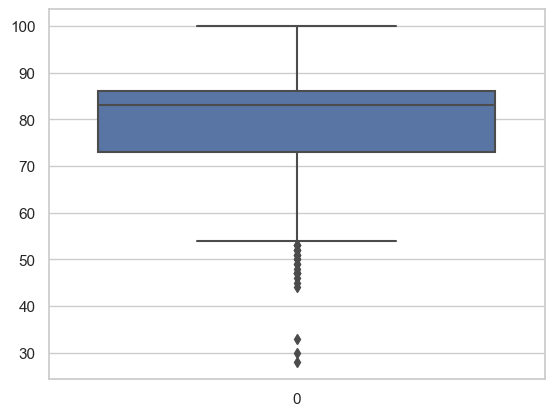

In [89]:
sns.boxplot(data=Combined_df['MetaScore'])

## Outlier Movies which have less than 50 MetaScore

In [90]:
Combined_df[(Combined_df['MetaScore']<50)]

Movie Title  Year of Release      Genre  Run Time  \
406  Pink Floyd: The Wall             1982      Drama        95   
430        Tropa de Elite             2007     Action       115   
484     Bohemian Rhapsody             2018  Biography       134   
513        Bound by Honor             1993      Crime       180   
626   Remember the Titans             2000  Biography       113   
627              Predator             1987     Action       107   
682   La migliore offerta             2013      Crime       131   
766           Man on Fire             2004     Action       146   
804   The Boondock Saints             1999     Action       108   
818           Primal Fear             1996      Crime       129   
845               Flipped             2010     Comedy        90   
934                   Saw             2004     Horror       103   
956  The Butterfly Effect             2004      Drama       113   
987              I Am Sam             2001      Drama       132   

     Movie Ratings Certificate   Votes  Collections in $M  MetaScore  \
406            8.0   Not Rated   83990              22.24         47   
430            8.0           R  108114               0.01         33   
484            7.9          UA  570979             216.43         49   
513            7.9           R   33233               4.50         47   
626            7.8           U  226727             115.65         48   
627            7.8           A  442659              59.74         47   
682            7.8           R  125623               0.09         49   
766            7.7          UA  380213              77.91         47   
804            7.7           A  246358               0.03         44   
818            7.7           A  239379              56.12         47   
845            7.7       PG-13   95058               1.75         45   
934            7.6           A  451142              56.00         46   
956            7.6          UA  510747              57.94         30   
987            7.6           U  153618              40.31         28   

        Review  
406  Very Good  
430  Very Good  
484       Good  
513       Good  
626       Good  
627       Good  
682       Good  
766       Good  
804       Good  
818       Good  
845       Good  
934       Good  
956       Good  
987       Good

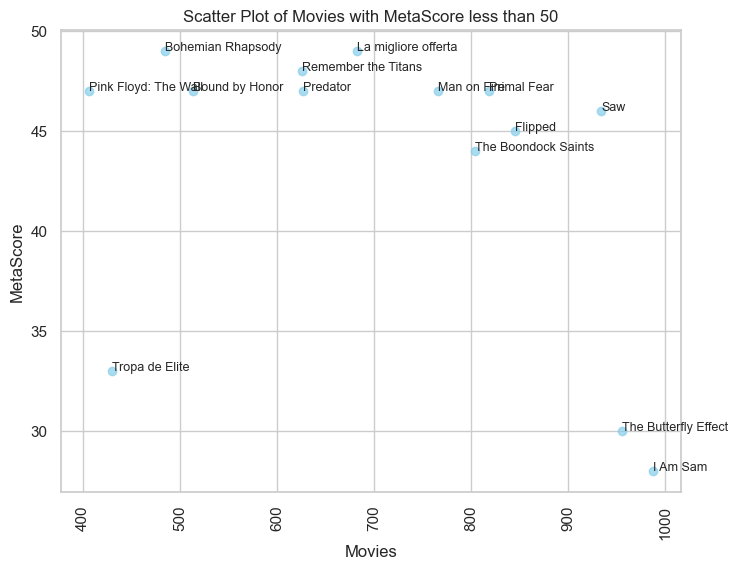

In [91]:
low_metascore_movies = Combined_df[Combined_df['MetaScore'] < 50]
plt.figure(figsize=(8, 6))
plt.scatter(low_metascore_movies.index, low_metascore_movies['MetaScore'], marker='o', c='skyblue', alpha=0.7)
for i, movie in enumerate(low_metascore_movies['Movie Title']):
    plt.text(low_metascore_movies.index[i], low_metascore_movies['MetaScore'].iloc[i], movie, fontsize=9)

plt.title('Scatter Plot of Movies with MetaScore less than 50')
plt.xlabel('Movies')
plt.ylabel('MetaScore')
plt.xticks(rotation=90)
plt.show()

In [92]:
#Combined_df.to_csv("IMDB project.csv")